# Register and visualize dataset

### Introduction

Bu laboratuvarda, müşteri ürün incelemeleri veri kümesini alıp dönüştüreceksiniz. Ardından, veri kümesini almak ve sorgulamak için AWS Glue ve Amazon Athena gibi AWS veri yığını hizmetlerini kullanacaksınız. Son olarak, veri kümesini analiz etmek ve içgörüler çıkaran bazı görseller çizmek için AWS Data Wrangler'ı kullanacaksınız.

### Table of Contents

- [1. Ingest and transform the public dataset](#c1w1-1.)
  - [1.1. List the dataset files in the public S3 bucket](#c1w1-1.1.)
    - [Exercise 1](#c1w1-ex-1)
  - [1.2. Copy the data locally to the notebook](#c1w1-1.2.)
  - [1.3. Transform the data](#c1w1-1.3.)
  - [1.4 Write the data to a CSV file](#c1w1-1.4.)
- [2. Register the public dataset for querying and visualizing](#c1w1-2.)
  - [2.1. Register S3 dataset files as a table for querying](#c1w1-2.1.)
    - [Exercise 2](#c1w1-ex-2)
  - [2.2. Create default S3 bucket for Amazon Athena](#c1w1-2.2.)
- [3. Visualize data](#c1w1-3.)
  - [3.1. Preparation for data visualization](#c1w1-3.1.)
  - [3.2. How many reviews per sentiment?](#c1w1-3.2.)
    - [Exercise 3](#c1w1-ex-3)
  - [3.3. Which product categories are highest rated by average sentiment?](#c1w1-3.3.)
  - [3.4. Which product categories have the most reviews?](#c1w1-3.4.)
    - [Exercise 4](#c1w1-ex-4)
  - [3.5. What is the breakdown of sentiments per product category?](#c1w1-3.5.)
  - [3.6. Analyze the distribution of review word counts](#c1w1-3.6.)

<a name='c1w1-1.'></a>
# 1. Ingest and transform the public dataset

Ana veri seti olarak [Women's Clothing Reviews](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) veri seti seçilmiştir.

Genel bir Amazon S3 klasöründe paylaşılır ve virgülle ayrılmış değer (CSV) metin biçimi olarak sunulur:

`s3://dlai-practical-data-science/data/raw/womens_clothing_ecommerce_reviews.csv`

<a name='c1w1-1.1.'></a>
### 1.1. List the dataset files in the public S3 bucket

[AWS Command Line Interface (CLI)](https://awscli.amazonaws.com/v2/documentation/api/latest/index.html), AWS hizmetlerinizi yönetmek için birleşik bir araçtır. Tek bir araçla, birden çok AWS hizmetini komut satırından kontrol edebilir ve bunları komut dosyaları aracılığıyla otomatikleştirebilirsiniz. Veri kümesi dosyalarını listelemek için kullanılır.

**View dataset files in CSV format**

```aws s3 ls [bucket_name]``` işlevi, S3 klasöründeki tüm nesneleri listeler. reviews veri dosyalarını CSV biçiminde görüntülemek için kullanalım:

<a name='c1w1-ex-1'></a>
### Exercise 1

`s3://dlai-practical-data-science/data/raw/` genel klasöründe bulunan dosyaların listesini görüntüleyelim.


**Instructions**:

`aws s3 ls [bucket_name]` işlevini kullanalım. 

AWS CLI komutunu not defterinden çalıştırmak için önüne bir ünlem işareti koymamız gerekir: `!aws`. 

Listede `womens_clothing_ecommerce_reviews.csv` veri dosyasını görmeliyiz.

In [1]:
!aws s3 ls s3://dlai-practical-data-science/data/raw/

2021-04-30 02:21:06    8457214 womens_clothing_ecommerce_reviews.csv


<a name='c1w1-1.2.'></a>
### 1.2. Copy the data locally to the notebook

```aws s3 cp [bucket_name/file_name] [file_name]``` işlevi, dosyayı S3 klasöründen yerel ortama veya başka bir S3 grubuna kopyalar. Dosyayı veri kümesiyle yerel olarak kopyalamak için kullanalım.

In [2]:
!aws s3 cp s3://dlai-practical-data-science/data/raw/womens_clothing_ecommerce_reviews.csv ./womens_clothing_ecommerce_reviews.csv

download: s3://dlai-practical-data-science/data/raw/womens_clothing_ecommerce_reviews.csv to ./womens_clothing_ecommerce_reviews.csv


Now use the Pandas dataframe to load and preview the data.

In [3]:
import pandas as pd
import csv

df = pd.read_csv('./womens_clothing_ecommerce_reviews.csv',
                 index_col=0)

df.shape

(23486, 10)

In [4]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,847,33,"Cute, crisp shirt",If this product was in petite i would get the...,4,1,2,General,Tops,Blouses
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,I love love love this jumpsuit. it's fun fl...,5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,It reminds me of maternity clothes. soft stre...,3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through",This fit well but the top was very see throug...,3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


<a name='c1w1-1.3.'></a>
### 1.3. Transform the data
Görevi basitleştirmek için, verileri yalnızca orijinal verilerden türetilen bir `review_body`, `product_category` ve `sentiment` içeren virgülle ayrılmış BİR CSV dosyasına dönüştüreceğiz.

In [5]:
df_transformed = df.rename(columns={'Review Text': 'review_body',
                                    'Rating': 'star_rating',
                                    'Class Name': 'product_category'})
df_transformed.drop(columns=['Clothing ID', 'Age', 'Title', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name'],
                    inplace=True)

df_transformed.dropna(inplace=True)

df_transformed.shape

(22628, 3)

Şimdi `star_rating`i, daha sonra tahmin için kullanılacak olan `sentiment`e (pozitif, nötr, negatif) dönüştürelim.

In [6]:
def to_sentiment(star_rating):
    if star_rating in {1, 2}: # negative
        return -1 
    if star_rating == 3:      # neutral
        return 0
    if star_rating in {4, 5}: # positive
        return 1

# transform star_rating into the sentiment
df_transformed['sentiment'] = df_transformed['star_rating'].apply(lambda star_rating: 
    to_sentiment(star_rating=star_rating) 
)

# drop the star rating column
df_transformed.drop(columns=['star_rating'],
                    inplace=True)

# remove reviews for product_categories with < 10 reviews
df_transformed = df_transformed.groupby('product_category').filter(lambda reviews : len(reviews) > 10)[['sentiment', 'review_body', 'product_category']]

df_transformed.shape

(22626, 3)

In [7]:
# preview the results
df_transformed

,sentiment,review_body,product_category
0,1,If this product was in petite i would get the...,Blouses
1,1,Love this dress! it's sooo pretty. i happene...,Dresses
2,0,I had such high hopes for this dress and reall...,Dresses
3,1,I love love love this jumpsuit. it's fun fl...,Pants
4,1,This shirt is very flattering to all due to th...,Blouses
...,...,...,...
23481,1,I was very happy to snag this dress at such a ...,Dresses
23482,0,It reminds me of maternity clothes. soft stre...,Knits
23483,0,This fit well but the top was very see throug...,Dresses
23484,0,I bought this dress for a wedding i have this ...,Dresses


<a name='c1w1-1.4.'></a>
### 1.4 Write the data to a CSV file

In [8]:
df_transformed.to_csv('./womens_clothing_ecommerce_reviews_transformed.csv', 
                      index=False)

In [9]:
!head -n 5 ./womens_clothing_ecommerce_reviews_transformed.csv

sentiment,review_body,product_category
1,If this product was in petite  i would get the petite. the regular is a little long on me but a tailor can do a simple fix on that.     fits nicely! i'm 5'4  130lb and pregnant so i bough t medium to grow into.     the tie can be front or back so provides for some nice flexibility on form fitting.,Blouses
1,"Love this dress!  it's sooo pretty.  i happened to find it in a store  and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8"".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.",Dresses
0,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium  which was just ok. overall  the top half was comfortable and fit nicely  but the bott

<a name='c1w1-2.'></a>
# 2. Register the public dataset for querying and visualizing

Veri kümemizi geniş ölçekte sorgulayıp görselleştirebilmemiz için genel veri kümesini S3 destekli bir veritabanı tablosuna kaydedeceğiz.

<a name='c1w1-2.1.'></a>
### 2.1. Register S3 dataset files as a table for querying
## 2.1. Register S3 dataset files as a table for querying

Gerekli modülleri import edelim.

`boto3` Amazon Elastic Compute Cloud (Amazon EC2) ve Amazon Simple Storage Service (Amazon S3) gibi AWS hizmetlerini oluşturmak, yapılandırmak ve yönetmek için Python'a yönelik AWS SDK'sıdır. SDK, nesne yönelimli bir API'nin yanı sıra AWS hizmetlerine düşük düzeyde erişim sağlar.

`sagemaker` Amazon SageMaker ile çalışmak için birkaç üst düzey soyutlama sağlayan SageMaker Python SDK'sıdır.

In [10]:
import boto3
import sagemaker
import pandas as pd
import numpy as np
import botocore

config = botocore.config.Config(user_agent_extra='dlai-pds/c1/w1')

# low-level service client of the boto3 session
sm = boto3.client(service_name='sagemaker', 
                  config=config)

sess = sagemaker.Session(sagemaker_client=sm)                         

bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = sess.boto_region_name
account_id = sess.account_id

print('S3 Bucket: {}'.format(bucket))
print('Region: {}'.format(region))
print('Account ID: {}'.format(account_id))

/opt/conda/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


S3 Bucket: sagemaker-us-east-1-156641161428
Region: us-east-1
Account ID: <bound method Session.account_id of <sagemaker.session.Session object at 0x7fbbb4812850>>


Review the empty bucket which was created automatically for this account. (Bu hesap için otomatik olarak oluşturulan boş grubu inceleyelim.)

**Instructions:**

- bağlantıyı açalım
- `sagemaker-us-east-1-ACCOUNT` bucket adına tıklayalım
- boş olup olmadığını kontrol edelim



In [11]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/home?region={}#">Amazon S3 buckets</a></b>'.format(region)))

Copy the file into the S3 bucket.

In [12]:
!aws s3 cp ./womens_clothing_ecommerce_reviews_transformed.csv s3://$bucket/data/transformed/womens_clothing_ecommerce_reviews_transformed.csv

upload: ./womens_clothing_ecommerce_reviews_transformed.csv to s3://sagemaker-us-east-1-156641161428/data/transformed/womens_clothing_ecommerce_reviews_transformed.csv


Review the bucket with the file we uploaded above. (Yukarıda yüklediğimiz dosyanın bulunduğu grubu inceleyelim)

**Instructions:**

- Bağlantıyı açalım
- CSV dosyasının S3 bucketındaki bulunduğu konumu kontrol edelim
- Konum dizini yapısının yukarıdaki CLI komutundakiyle aynı olup olmadığını kontrol edelim
- Dosya adına tıklayalım ve dosyayla ilgili mevcut bilgileri görelim (region, size, S3 URI, Amazon Resource Name (ARN))

In [13]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/buckets/{}?region={}&prefix=data/transformed/#">Amazon S3 buckets</a></b>'.format(bucket, region)))

**Import AWS Data Wrangler**

[AWS Data Wrangler](https://github.com/awslabs/aws-data-wrangler), AWS Professional Service tarafından geliştirilen açık kaynaklı bir Python girişimidir ve Pandas kütüphanesinin gücünü AWS'ye bağlayarak dataframeleri ve AWS veri ile ilişkili hizmetleri (Amazon Redshift, AWS Glue, Amazon Athena, Amazon EMR, Amazon QuickSight vb.) birleştirir.

Diğer açık kaynaklı projeler olan Pandas, Apache Arrow, Boto3, SQLAlchemy, Psycopg2 ve PyMySQL üzerine inşa edilmiş olup, veri gölleri, veri ambarları ve veritabanlarından veri yükleme/boşaltma gibi tipik ETL (Extract, Transform, Load) görevlerini gerçekleştirmek için soyutlanmış işlevler sunar.


Review the AWS Data Wrangler documentation: https://aws-data-wrangler.readthedocs.io/en/stable/

In [14]:
!pip install awswrangler

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [15]:
import awswrangler as wr

**Create AWS Glue Catalog database**

AWS Glue'un veri katalogu özellikleri ve Amazon S3 ile entegrasyonu, veriyi tanımlama sürecini basitleştirir ve keşfedilen veriden şema tanımını türetmeyi kolaylaştırır. Veri kataloğunuz içindeki AWS Glue tarayıcılarını kullanarak, Amazon S3'te depolanan verilerinizi gezinebilir ve veri kataloğunuzda tanımlanan meta veri tablolarını oluşturabilirsiniz.

Burada `wr.catalog.create_database` işlevini kullanarak, `dsoaws_deep_learning` `("dsoaws" "Data Science on AWS" anlamına gelir)` adında bir veritabanı oluşturacağız.

In [16]:
wr.catalog.create_database(
    name='dsoaws_deep_learning',
    exist_ok=True
)

In [17]:
dbs = wr.catalog.get_databases()

for db in dbs:
    print("Database name: " + db['Name'])

Database name: dsoaws_deep_learning


Review the created database in the AWS Glue Catalog.

**Instructions**:
- Bağlantıyı açalım
- Sol taraftaki panelde, AWS Glue -> Data Catalog -> Databases altında çalıştığımıza dikkat edelim
- `dsoaws_deep_learning` adında bir veritabanı oluşturulduğunu kontrol edeli
- Veri tabanı adına tıklayalım
- `dsoaws_deep_learning` içindeki tablolar bağlantısına tıklayarak tabloların olmadığını görelim

In [18]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://console.aws.amazon.com/glue/home?region={}#catalog:tab=databases">AWS Glue Databases</a></b>'.format(region)))

**Register CSV data with AWS Glue Catalog**

<a name='c1w1-ex-2'></a>
### Exercise 2

Register CSV data with AWS Glue Catalog.

**Instructions**:
- Aşağıdaki parametrelerle `wr.catalog.create_csv_table` işlevini kullanalım
```python
res = wr.catalog.create_csv_table(
    database='...', # AWS Glue Catalog database name
    path='s3://{}/data/transformed/'.format(bucket), # S3 object path for the data
    table='reviews', # registered table name
    columns_types={
        'sentiment': 'int',        
        'review_body': 'string',
        'product_category': 'string'      
    },
    mode='overwrite',
    skip_header_line_count=1,
    sep=','    
)
```

In [19]:
wr.catalog.create_csv_table(
    database='dsoaws_deep_learning',
    path='s3://{}/data/transformed/'.format(bucket), 
    table="reviews",    
    columns_types={
        'sentiment': 'int',        
        'review_body': 'string',
        'product_category': 'string'      
    },
    mode='overwrite',
    skip_header_line_count=1,
    sep=','
)

Review the registered table in the AWS Glue Catalog. (AWS Glue Kataloğu'ndaki kayıtlı tabloyu inceleyelim.)

**Instructions**:

- Linki açalım
- Sol taraftaki panelde AWS Glue -> Data Catalog -> Databases -> Tables konumunda olduğumuza dikkat edelim
- `dsoaws_deep_learning` veritabanındaki tablo incelemelerini listede görebildiğimizden emin olalım
- Tablonun adına tıklayalım
- Tablo hakkındaki mevcut bilgileri araştıralım (name, database, classification, location, schema etc.)

In [20]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://console.aws.amazon.com/glue/home?region={}#">AWS Glue Catalog</a></b>'.format(region)))

Review the table shape:

In [21]:
table = wr.catalog.table(database='dsoaws_deep_learning',
                         table='reviews')
table

,Column Name,Type,Partition,Comment
0,sentiment,int,False,
1,review_body,string,False,
2,product_category,string,False,


<a name='c1w1-2.2.'></a>
### 2.2. Create default S3 bucket for Amazon Athena

Amazon Athena, geçici sorgu sonuçlarını depolamak ve sonraki sorguların performansını iyileştirmek için bu S3 bucket'ı gerektirir.

Bu bucket'ın içeriği çoğunlukla binarydir ve insanlar tarafından okunamaz.

In [22]:
# S3 bucket name
wr.athena.create_athena_bucket()

's3://aws-athena-query-results-156641161428-us-east-1/'

<a name='c1w1-3.'></a>
# 3. Visualize data

**Reviews dataset - column descriptions**

- `sentiment`: The review's sentiment (-1, 0, 1).
- `product_category`: İncelemeleri gruplandırmak için kullanılabilecek geniş ürün kategorisi (in this case digital videos).
- `review_body`: The text of the review.


<a name='c1w1-3.1.'></a>
### 3.1. Preparation for data visualization

**Imports**

In [23]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

**Settings**

Set AWS Glue database and table name.

In [24]:
# Do not change the database and table names - they are used for grading purposes!
database_name = 'dsoaws_deep_learning'
table_name = 'reviews'

Seaborn parametrelerini ayarlayalım. Seaborn dokümantasyonunu [linkten](https://seaborn.pydata.org/index.html) inceleyebilirsiniz.

In [25]:
sns.set_style = 'seaborn-whitegrid'

sns.set(rc={"font.style":"normal",
            "axes.facecolor":"white",
            'grid.color': '.8',
            'grid.linestyle': '-',
            "figure.facecolor":"white",
            "figure.titlesize":20,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':10,
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

Helper code to display values on barplots:

**Run SQL queries using Amazon Athena**

**Amazon Athena** standart bir SQL arabirimi kullanarak Amazon S3'te veri sorgulamamıza olanak tanır. AWS Glue Catalog'daki veritabanlarını ve tabloları yansıtır. Etkileşimli sorgular oluşturabilir ve daha fazla downstream processing için gereken herhangi bir veri manipülasyonunu gerçekleştirebiliriz.

Standart SQL sorgusu bir string olarak kaydedilebilir ve ardından Athena sorgusuna bir parametre olarak iletilebilir. Duyguya (sentiment) göre toplam inceleme sayısını saymak için örnek olarak aşağıdaki hücreleri çalıştıralım. Buradaki SQL sorgusu aşağıdaki formu alacaktır:

```sql
SELECT column_name, COUNT(column_name) as new_column_name
FROM table_name
GROUP BY column_name
ORDER BY column_name
```

SQL sorgu ifadelerine aşina değilseniz, [linki](https://www.w3schools.com/sql/default.asp) takip ederek bazı eğitimleri inceleyebilirsiniz.

<a name='c1w1-3.2.'></a>
### 3.2. How many reviews per sentiment?

Set the SQL statement to find the count of sentiments:

In [26]:
statement_count_by_sentiment = """
SELECT sentiment, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY sentiment
ORDER BY sentiment
"""

print(statement_count_by_sentiment)


SELECT sentiment, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY sentiment
ORDER BY sentiment



Query data in Amazon Athena database cluster using the prepared SQL statement (Hazırlanan SQL deyimini kullanarak Amazon Athena veritabanı kümesindeki verileri sorgulayalım):

In [27]:
df_count_by_sentiment = wr.athena.read_sql_query(
    sql=statement_count_by_sentiment,
    database=database_name
)

print(df_count_by_sentiment)

   sentiment  count_sentiment
0         -1             2370
1          0             2823
2          1            17433


Preview the results of the query:

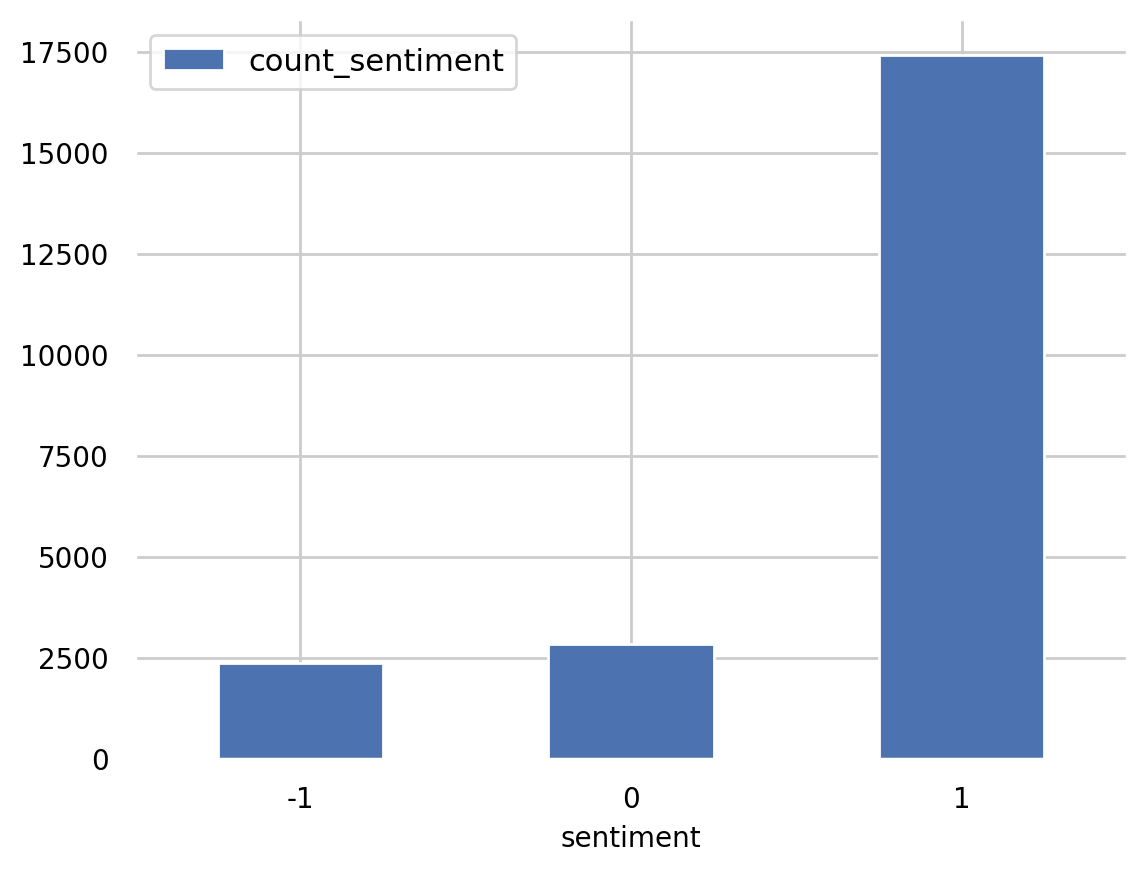

In [28]:
df_count_by_sentiment.plot(kind='bar', x='sentiment', y='count_sentiment', rot=0)

<a name='c1w1-ex-3'></a>
### Exercise 3

Tablo incelemelerinde `product_category` başına toplam ```reviews```sayısını hesaplamak için parametre olarak iletilen standart SQL deyimiyle Amazon Athena sorgusunu kullanalım.

**Instructions:** Pass the SQL statement of the form

**Instructions**: Pass the SQL statement of the form

```sql
SELECT category_column, COUNT(column_name) AS new_column_name
FROM table_name
GROUP BY category_column
ORDER BY new_column_name DESC
```

as a triple quote string into the variable `statement_count_by_category`. Please use the column `sentiment` in the `COUNT` function and give it a new name `count_sentiment`.

In [29]:
# Replace all None
statement_count_by_category = """
SELECT product_category, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY product_category 
ORDER BY count_sentiment DESC
"""
### END SOLUTION - DO NOT delete this comment for grading purposes
print(statement_count_by_category)


SELECT product_category, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY product_category 
ORDER BY count_sentiment DESC



Query data in Amazon Athena database passing the prepared SQL statement:

In [30]:
%%time
df_count_by_category = wr.athena.read_sql_query(
    sql=statement_count_by_category,
    database=database_name
)

df_count_by_category

CPU times: user 272 ms, sys: 4.73 ms, total: 277 ms
Wall time: 2.81 s


,product_category,count_sentiment
0,Dresses,6145
1,Knits,4626
2,Blouses,2983
3,Sweaters,1380
4,Pants,1350
5,Jeans,1104
6,Fine gauge,1059
7,Skirts,903
8,Jackets,683
9,Lounge,669


<a name='c1w1-3.3.'></a>
### 3.3. Which product categories are highest rated by average sentiment?

SSonuçları azalan sırada (descending order) gösteren, ürün kategorisi başına ortalama duyarlılığı (average sentiment) bulmak için SQL kodunu yazalım:

In [31]:
statement_avg_by_category = """
SELECT product_category, AVG(sentiment) AS avg_sentiment
FROM {} 
GROUP BY product_category 
ORDER BY avg_sentiment DESC
""".format(table_name)

print(statement_avg_by_category)


SELECT product_category, AVG(sentiment) AS avg_sentiment
FROM reviews 
GROUP BY product_category 
ORDER BY avg_sentiment DESC



Query data in Amazon Athena database passing the prepared SQL statement:

In [32]:
%%time
df_avg_by_category = wr.athena.read_sql_query(
    sql=statement_avg_by_category,
    database=database_name
)

CPU times: user 272 ms, sys: 10.1 ms, total: 282 ms
Wall time: 2.9 s


Geçici S3 bucketındaki sorgu sonuçlarını önizleyelim : 
- `s3://aws-athena-query-results-ACCOUNT-REGION/`

**Instructions**: 
- Bağlantıyı açalım
- S3 bucketın ismini kontrol edelim
- Kısaca içeriğini kontrol edelim

In [33]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/buckets/aws-athena-query-results-{}-{}?region={}">Amazon S3 buckets</a></b>'.format(account_id, region, region)))

Preview the results of the query:

In [34]:
df_avg_by_category

,product_category,avg_sentiment
0,Layering,0.780303
1,Jeans,0.746377
2,Lounge,0.745889
3,Sleep,0.710280
4,Shorts,0.707237
5,Pants,0.705185
6,Intimates,0.700680
7,Jackets,0.699854
8,Skirts,0.696567
9,Legwear,0.696203


**Visualization**

In [35]:
def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()),2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)

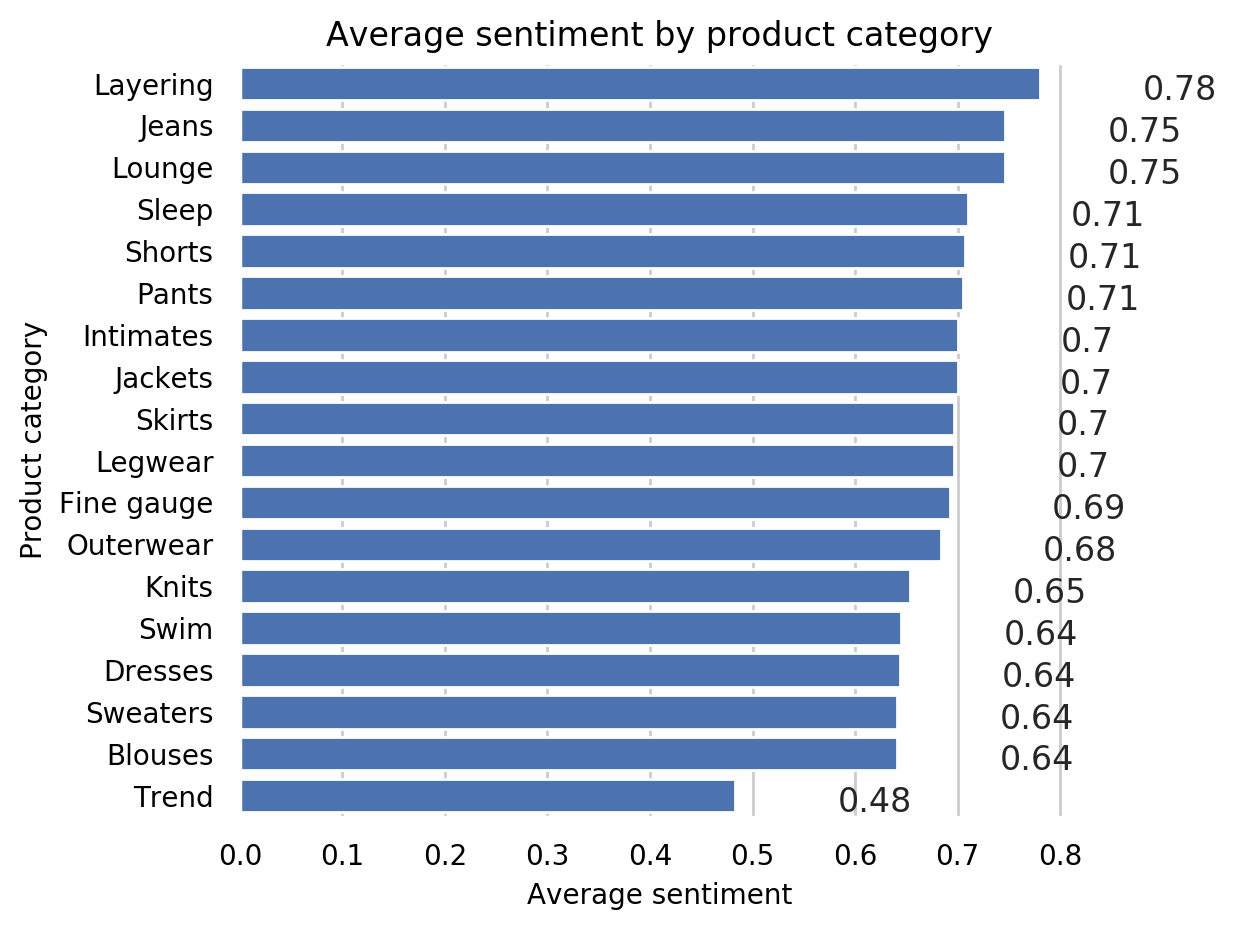

In [36]:
# Create plot
barplot = sns.barplot(
    data = df_avg_by_category, 
    y='product_category',
    x='avg_sentiment', 
    color="b", 
    saturation=1
)

# Set the size of the figure
sns.set(rc={'figure.figsize':(15.0, 10.0)})
    
# Set title and x-axis ticks 
plt.title('Average sentiment by product category')
#plt.xticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])

# Helper code to show actual values afters bars 
show_values_barplot(barplot, 0.1)

plt.xlabel("Average sentiment")
plt.ylabel("Product category")

plt.tight_layout()
# Do not change the figure name - it is used for grading purposes!
plt.savefig('avg_sentiment_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

In [37]:
# Upload image to S3 bucket
sess.upload_data(path='avg_sentiment_per_category.png', bucket=bucket, key_prefix="images")

's3://sagemaker-us-east-1-156641161428/images/avg_sentiment_per_category.png'

Review the bucket on the account.

**Instructions**: 
- Bağlantıyı açalım
- `sagemaker-us-east-1-ACCOUNT` S3 Bucket adına tıklayalım
- Resimler klasörünü açalım
- `avg_sentiment_per_category.png` resminin varlığını kontrol edelim
- Resim adına tıklarsak, resim dosyası ile ilgili bilgileri görebiliriz. Ayrıca sağ üstte yer alan Object Actions -> Download / Download komutu ile dosyayı indirebiliriz.
<img src="images/download_image_file.png" width="100%">

In [38]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/home?region={}">Amazon S3 buckets</a></b>'.format(region)))

<a name='c1w1-3.4.'></a>
### 3.4. Which product categories have the most reviews?

Sonuçları azalan sırayla (descending order) gösteren, ürün kategorisi başına duyarlılık sayısını (count of sentiment) bulmak için SQL sorgusunu ayarlayalım:

In [39]:
statement_count_by_category_desc = """
SELECT product_category, COUNT(*) AS count_reviews 
FROM {}
GROUP BY product_category 
ORDER BY count_reviews DESC
""".format(table_name)

print(statement_count_by_category_desc)


SELECT product_category, COUNT(*) AS count_reviews 
FROM reviews
GROUP BY product_category 
ORDER BY count_reviews DESC



Query data in Amazon Athena database passing the prepared SQL statement:

In [40]:
%%time
df_count_by_category_desc = wr.athena.read_sql_query(
    sql=statement_count_by_category_desc,
    database=database_name
)

CPU times: user 248 ms, sys: 7.96 ms, total: 256 ms
Wall time: 2.46 s


Store maximum number of sentiment for the visualization plot:

In [41]:
max_sentiment = df_count_by_category_desc['count_reviews'].max()
print('Highest number of reviews (in a single category): {}'.format(max_sentiment))

Highest number of reviews (in a single category): 6145


**Visualization**

<a name='c1w1-ex-4'></a>
### Exercise 4

Use `barplot` function to plot number of reviews per product category.

**Instructions**: Use the `barplot` chart example in the previous section, passing the newly defined dataframe `df_count_by_category_desc` with the count of reviews. Here, please put the `product_category` column into the `y` argument.

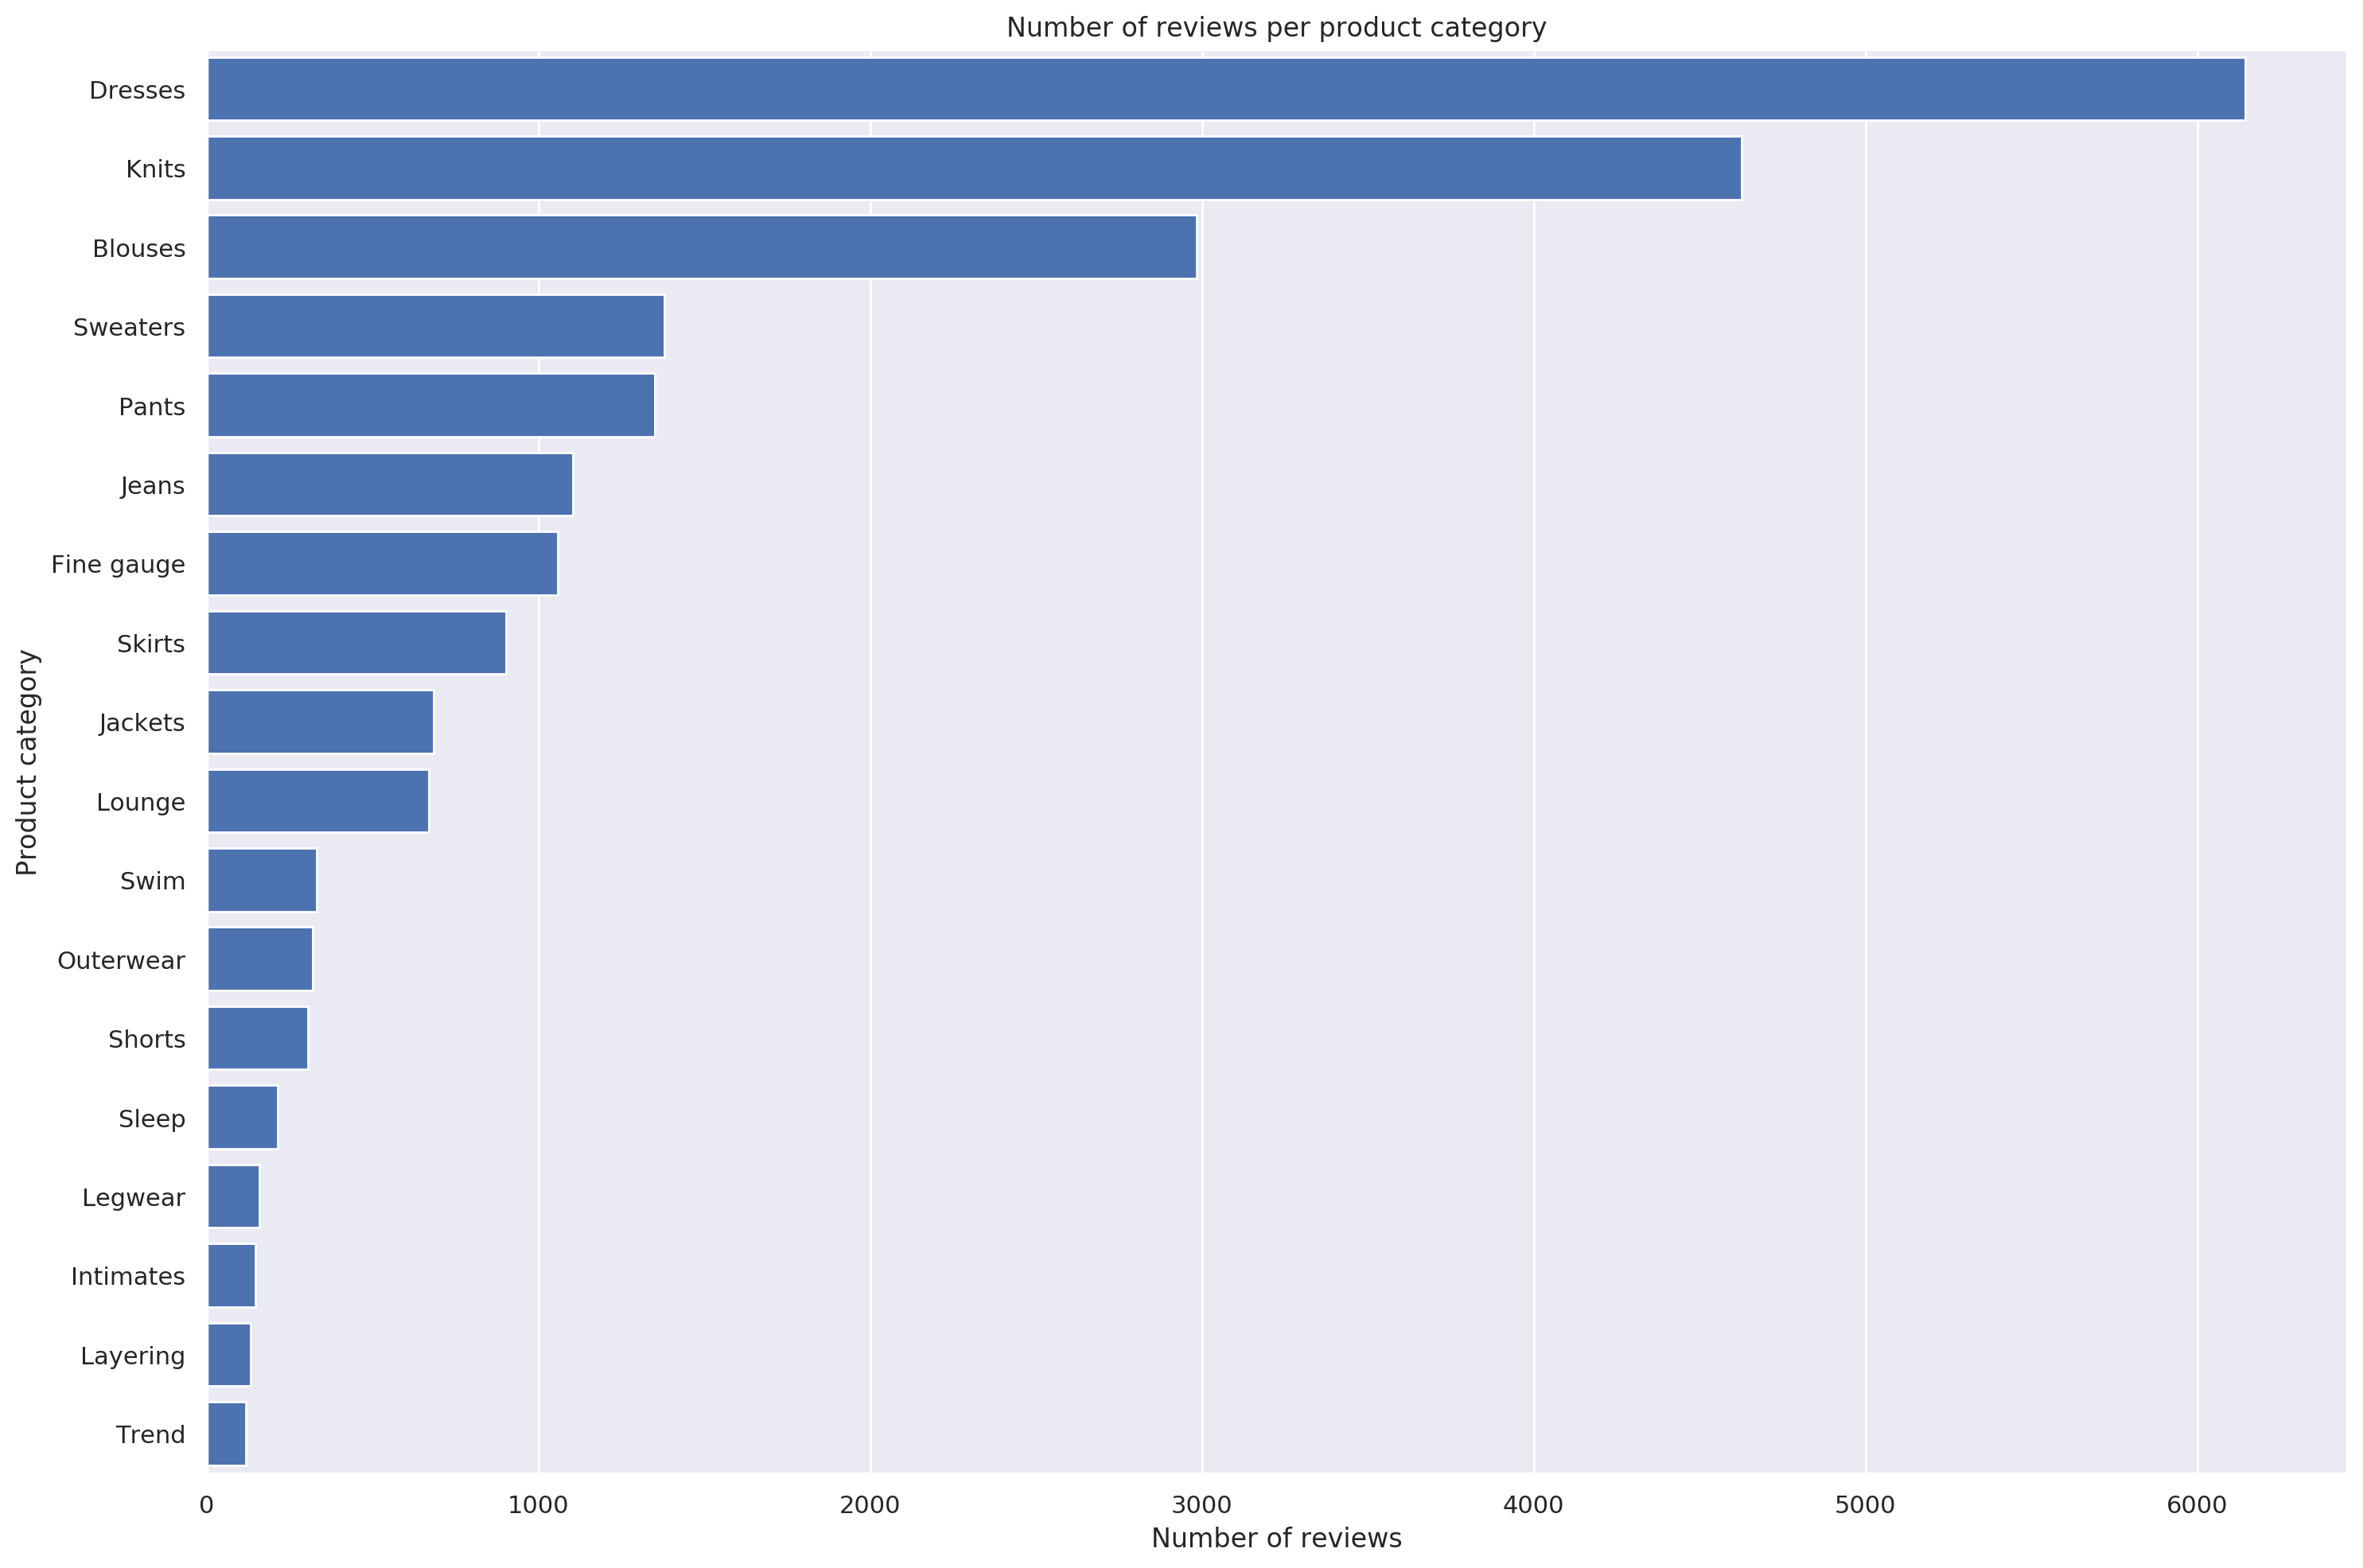

In [43]:
# Create seaborn barplot
barplot = sns.barplot(
    data=df_count_by_category_desc,
    y='product_category',
    x='count_reviews',
    color="b",
    saturation=1
)

# Set the size of the figure
sns.set(rc={'figure.figsize':(15.0, 10.0)})
    
# Set title
plt.title("Number of reviews per product category")
plt.xlabel("Number of reviews")
plt.ylabel("Product category")

plt.tight_layout()

# Do not change the figure name - it is used for grading purposes!
plt.savefig('num_reviews_per_category.png', dpi=300)

# Show the barplot
plt.show(barplot)

In [44]:
# Upload image to S3 bucket
sess.upload_data(path='num_reviews_per_category.png', bucket=bucket, key_prefix="images")

's3://sagemaker-us-east-1-156641161428/images/num_reviews_per_category.png'

<a name='c1w1-3.5.'></a>
### 3.5. What is the breakdown of sentiments per product category?

Set the SQL statement to find the count of sentiment per product category and sentiment:

In [45]:
statement_count_by_category_and_sentiment = """
SELECT product_category,
         sentiment,
         COUNT(*) AS count_reviews
FROM {}
GROUP BY  product_category, sentiment
ORDER BY  product_category ASC, sentiment DESC, count_reviews
""".format(table_name)

print(statement_count_by_category_and_sentiment)


SELECT product_category,
         sentiment,
         COUNT(*) AS count_reviews
FROM reviews
GROUP BY  product_category, sentiment
ORDER BY  product_category ASC, sentiment DESC, count_reviews



Query data in Amazon Athena database passing the prepared SQL statement:

In [46]:
%%time
df_count_by_category_and_sentiment = wr.athena.read_sql_query(
    sql=statement_count_by_category_and_sentiment,
    database=database_name
)

CPU times: user 236 ms, sys: 19.8 ms, total: 256 ms
Wall time: 2.33 s


Prepare for stacked percentage horizontal bar plot showing proportion of sentiments per product category.

In [47]:
# Create grouped dataframes by category and by sentiment
grouped_category = df_count_by_category_and_sentiment.groupby('product_category')
grouped_star = df_count_by_category_and_sentiment.groupby('sentiment')

# Create sum of sentiments per star sentiment
df_sum = df_count_by_category_and_sentiment.groupby(['sentiment']).sum()

# Calculate total number of sentiments
total = df_sum['count_reviews'].sum()
print('Total number of reviews: {}'.format(total))

Total number of reviews: 22626


Create dictionary of product categories and array of star rating distribution per category.

In [48]:
distribution = {}
count_reviews_per_star = []
i=0

for category, sentiments in grouped_category:
    count_reviews_per_star = []
    for star in sentiments['sentiment']:
        count_reviews_per_star.append(sentiments.at[i, 'count_reviews'])
        i=i+1;
    distribution[category] = count_reviews_per_star

Build array per star across all categories.

In [49]:
distribution

{'Blouses': [2256, 384, 343],
 'Dresses': [4634, 830, 681],
 'Fine gauge': [837, 118, 104],
 'Intimates': [117, 16, 14],
 'Jackets': [550, 61, 72],
 'Jeans': [909, 110, 85],
 'Knits': [3523, 605, 498],
 'Layering': [113, 9, 10],
 'Legwear': [126, 16, 16],
 'Lounge': [545, 78, 46],
 'Outerwear': [254, 29, 36],
 'Pants': [1074, 154, 122],
 'Shorts': [240, 39, 25],
 'Skirts': [714, 104, 85],
 'Sleep': [175, 16, 23],
 'Sweaters': [1036, 193, 151],
 'Swim': [252, 42, 38],
 'Trend': [78, 19, 21]}

In [50]:
df_distribution_pct = pd.DataFrame(distribution).transpose().apply(
    lambda num_sentiments: num_sentiments/sum(num_sentiments)*100, axis=1
)
df_distribution_pct.columns=['1', '0', '-1']
df_distribution_pct

,1,0,-1
Blouses,75.628562,12.872947,11.498491
Dresses,75.410903,13.506916,11.082181
Fine gauge,79.036827,11.142587,9.820585
Intimates,79.591837,10.884354,9.523810
Jackets,80.527086,8.931186,10.541728
Jeans,82.336957,9.963768,7.699275
Knits,76.156507,13.078253,10.765240
Layering,85.606061,6.818182,7.575758
Legwear,79.746835,10.126582,10.126582
Lounge,81.464873,11.659193,6.875934


**Visualization**

Plot the distributions of sentiments per product category.

<Figure size 1000x500 with 0 Axes>

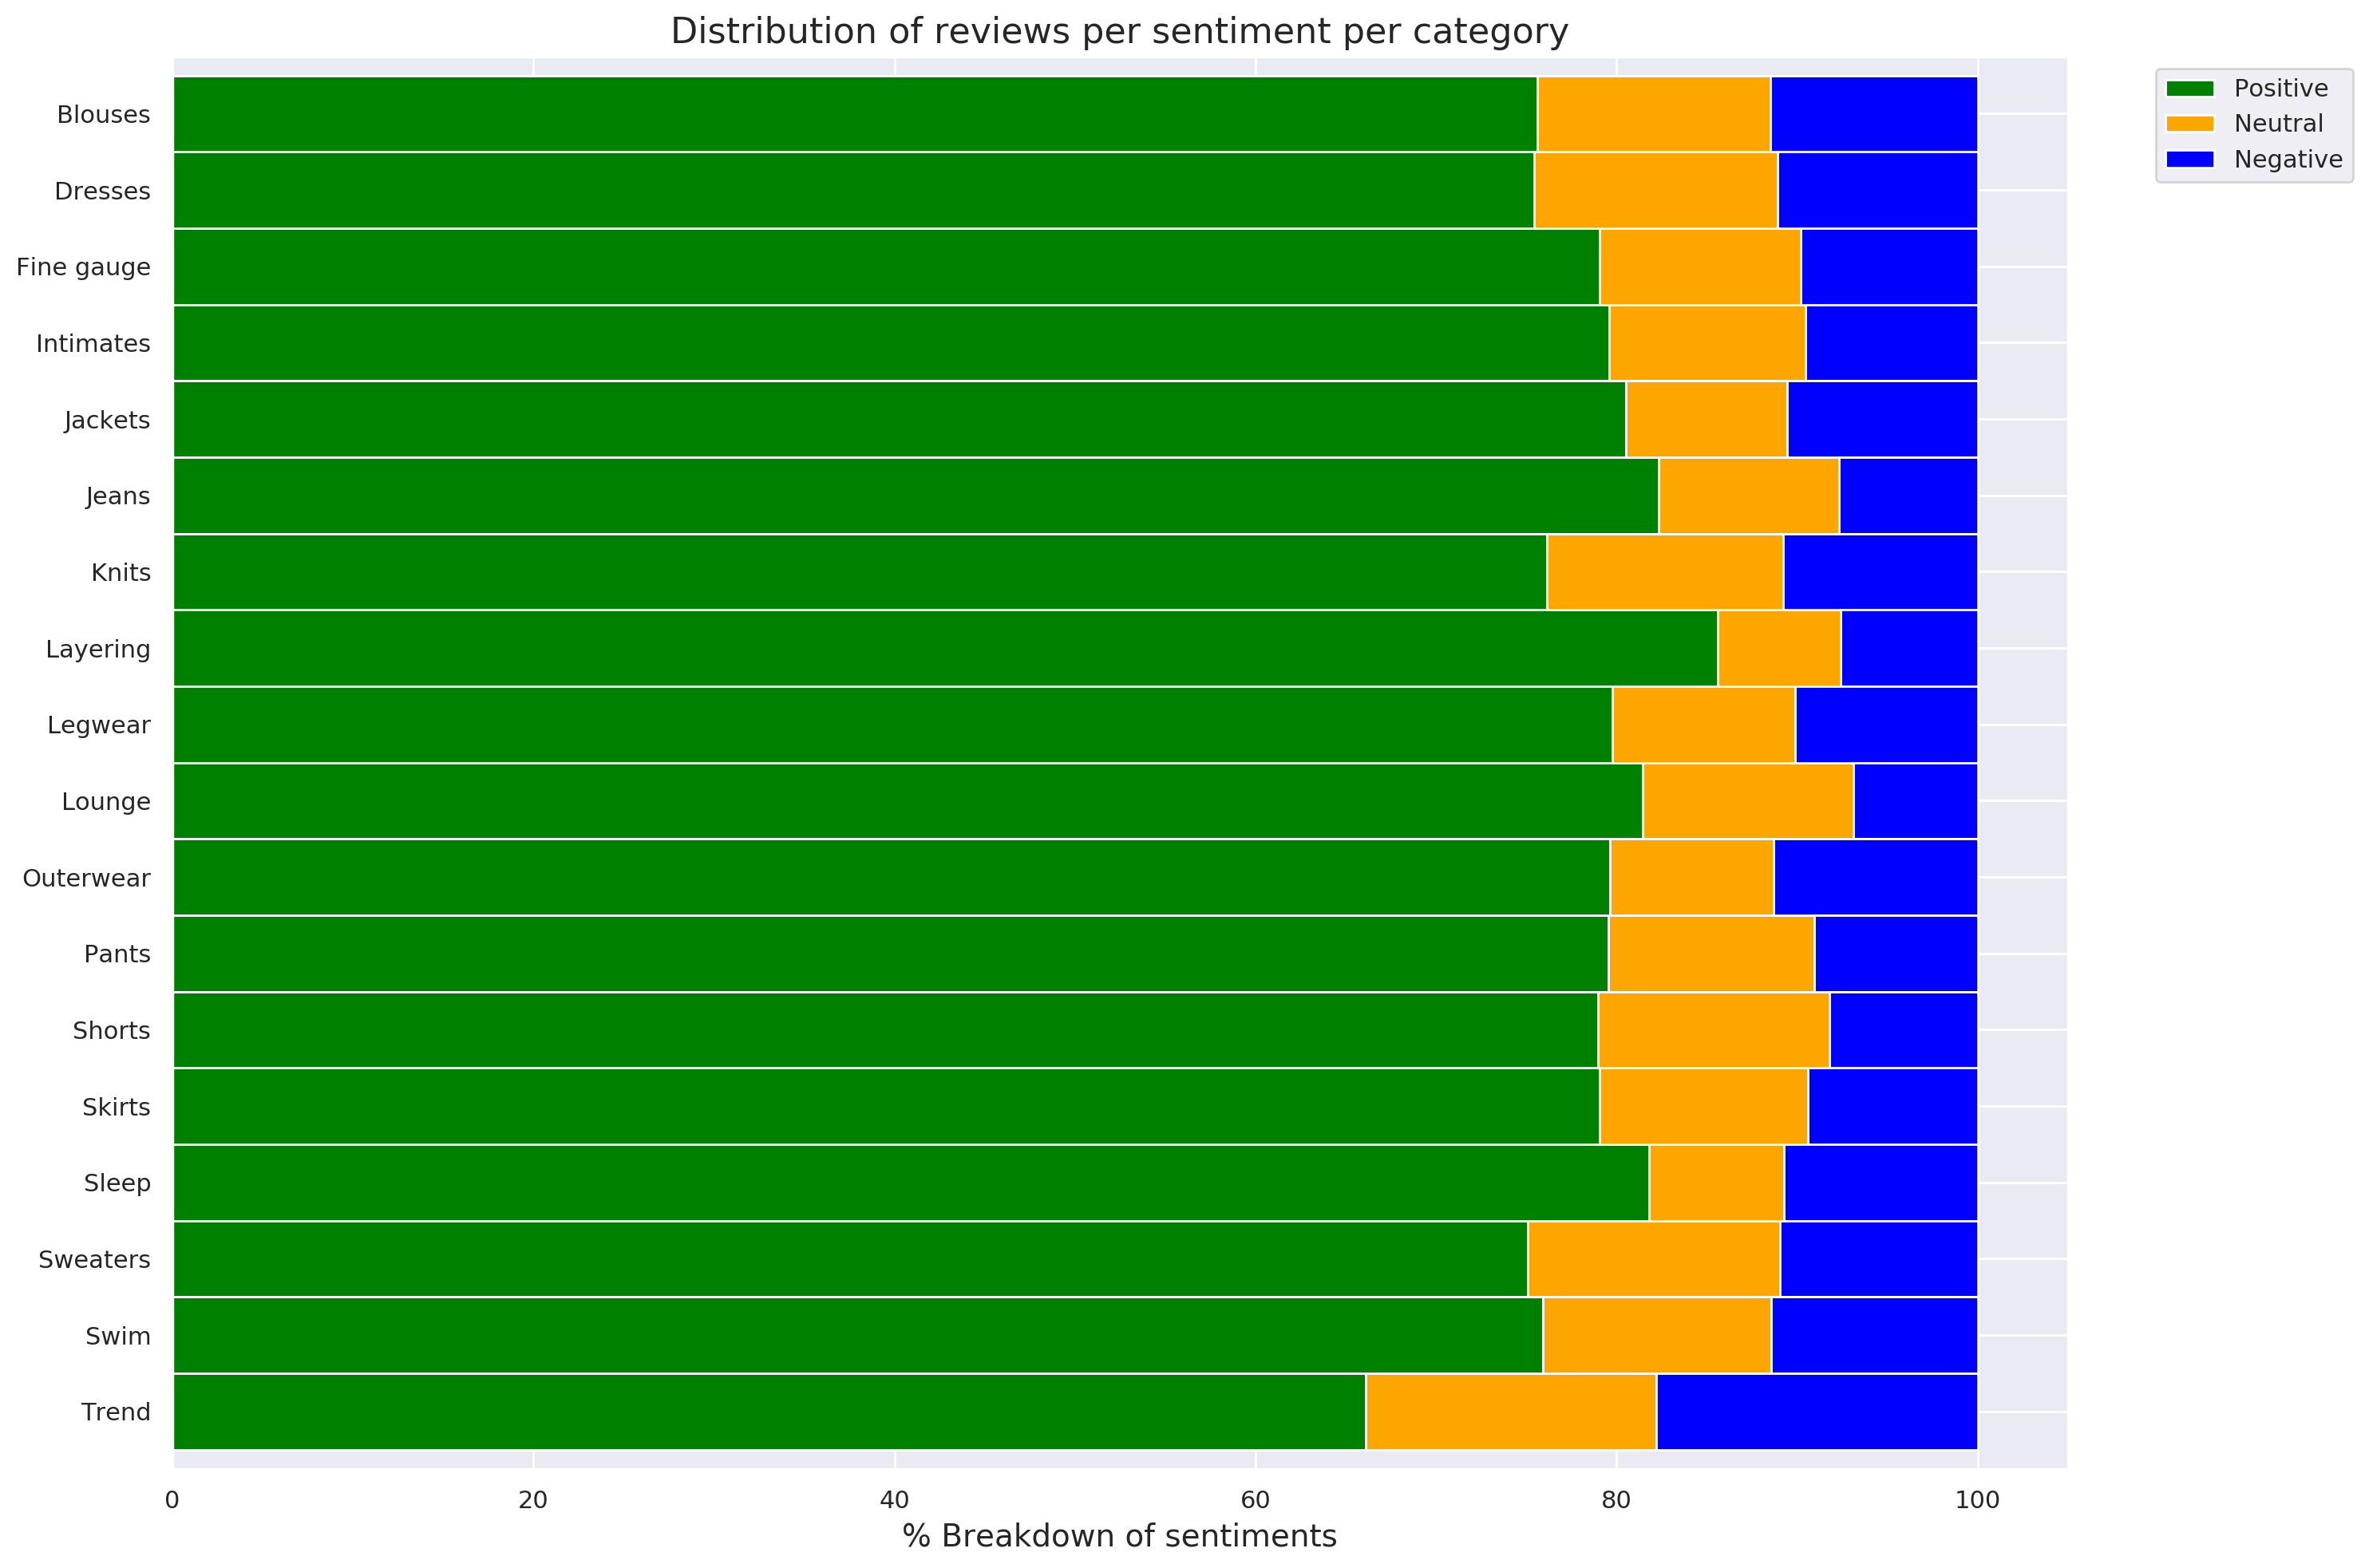

In [51]:
categories = df_distribution_pct.index

# Plot bars
plt.figure(figsize=(10,5))

df_distribution_pct.plot(kind="barh", 
                         stacked=True, 
                         edgecolor='white',
                         width=1.0,
                         color=['green', 
                                'orange', 
                                'blue'])

plt.title("Distribution of reviews per sentiment per category", 
          fontsize='16')

plt.legend(bbox_to_anchor=(1.04,1), 
           loc="upper left",
           labels=['Positive', 
                   'Neutral', 
                   'Negative'])

plt.xlabel("% Breakdown of sentiments", fontsize='14')
plt.gca().invert_yaxis()
plt.tight_layout()

# Do not change the figure name - it is used for grading purposes!
plt.savefig('distribution_sentiment_per_category.png', dpi=300)
plt.show()

In [52]:
# Upload image to S3 bucket
sess.upload_data(path='distribution_sentiment_per_category.png', bucket=bucket, key_prefix="images")

's3://sagemaker-us-east-1-156641161428/images/distribution_sentiment_per_category.png'

<a name='c1w1-3.6.'></a>
### 3.6. Analyze the distribution of review word counts

Set the SQL statement to count the number of the words in each of the reviews:

In [53]:
statement_num_words = """
    SELECT CARDINALITY(SPLIT(review_body, ' ')) as num_words
    FROM {}
""".format(table_name)

print(statement_num_words)


    SELECT CARDINALITY(SPLIT(review_body, ' ')) as num_words
    FROM reviews



Query data in Amazon Athena database passing the SQL statement:

In [54]:
%%time
df_num_words = wr.athena.read_sql_query(
    sql=statement_num_words,
    database=database_name
)

CPU times: user 239 ms, sys: 14.1 ms, total: 253 ms
Wall time: 2.49 s


Print out and analyse some descriptive statistics: 

In [55]:
summary = df_num_words["num_words"].describe(percentiles=[0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
summary

count    22626.000000
mean        62.709847
std         29.993735
min          2.000000
10%         22.000000
20%         33.000000
30%         42.000000
40%         51.000000
50%         61.000000
60%         72.000000
70%         86.000000
80%         97.000000
90%        103.000000
100%       122.000000
max        122.000000
Name: num_words, dtype: float64

Plot the distribution of the words number per review:

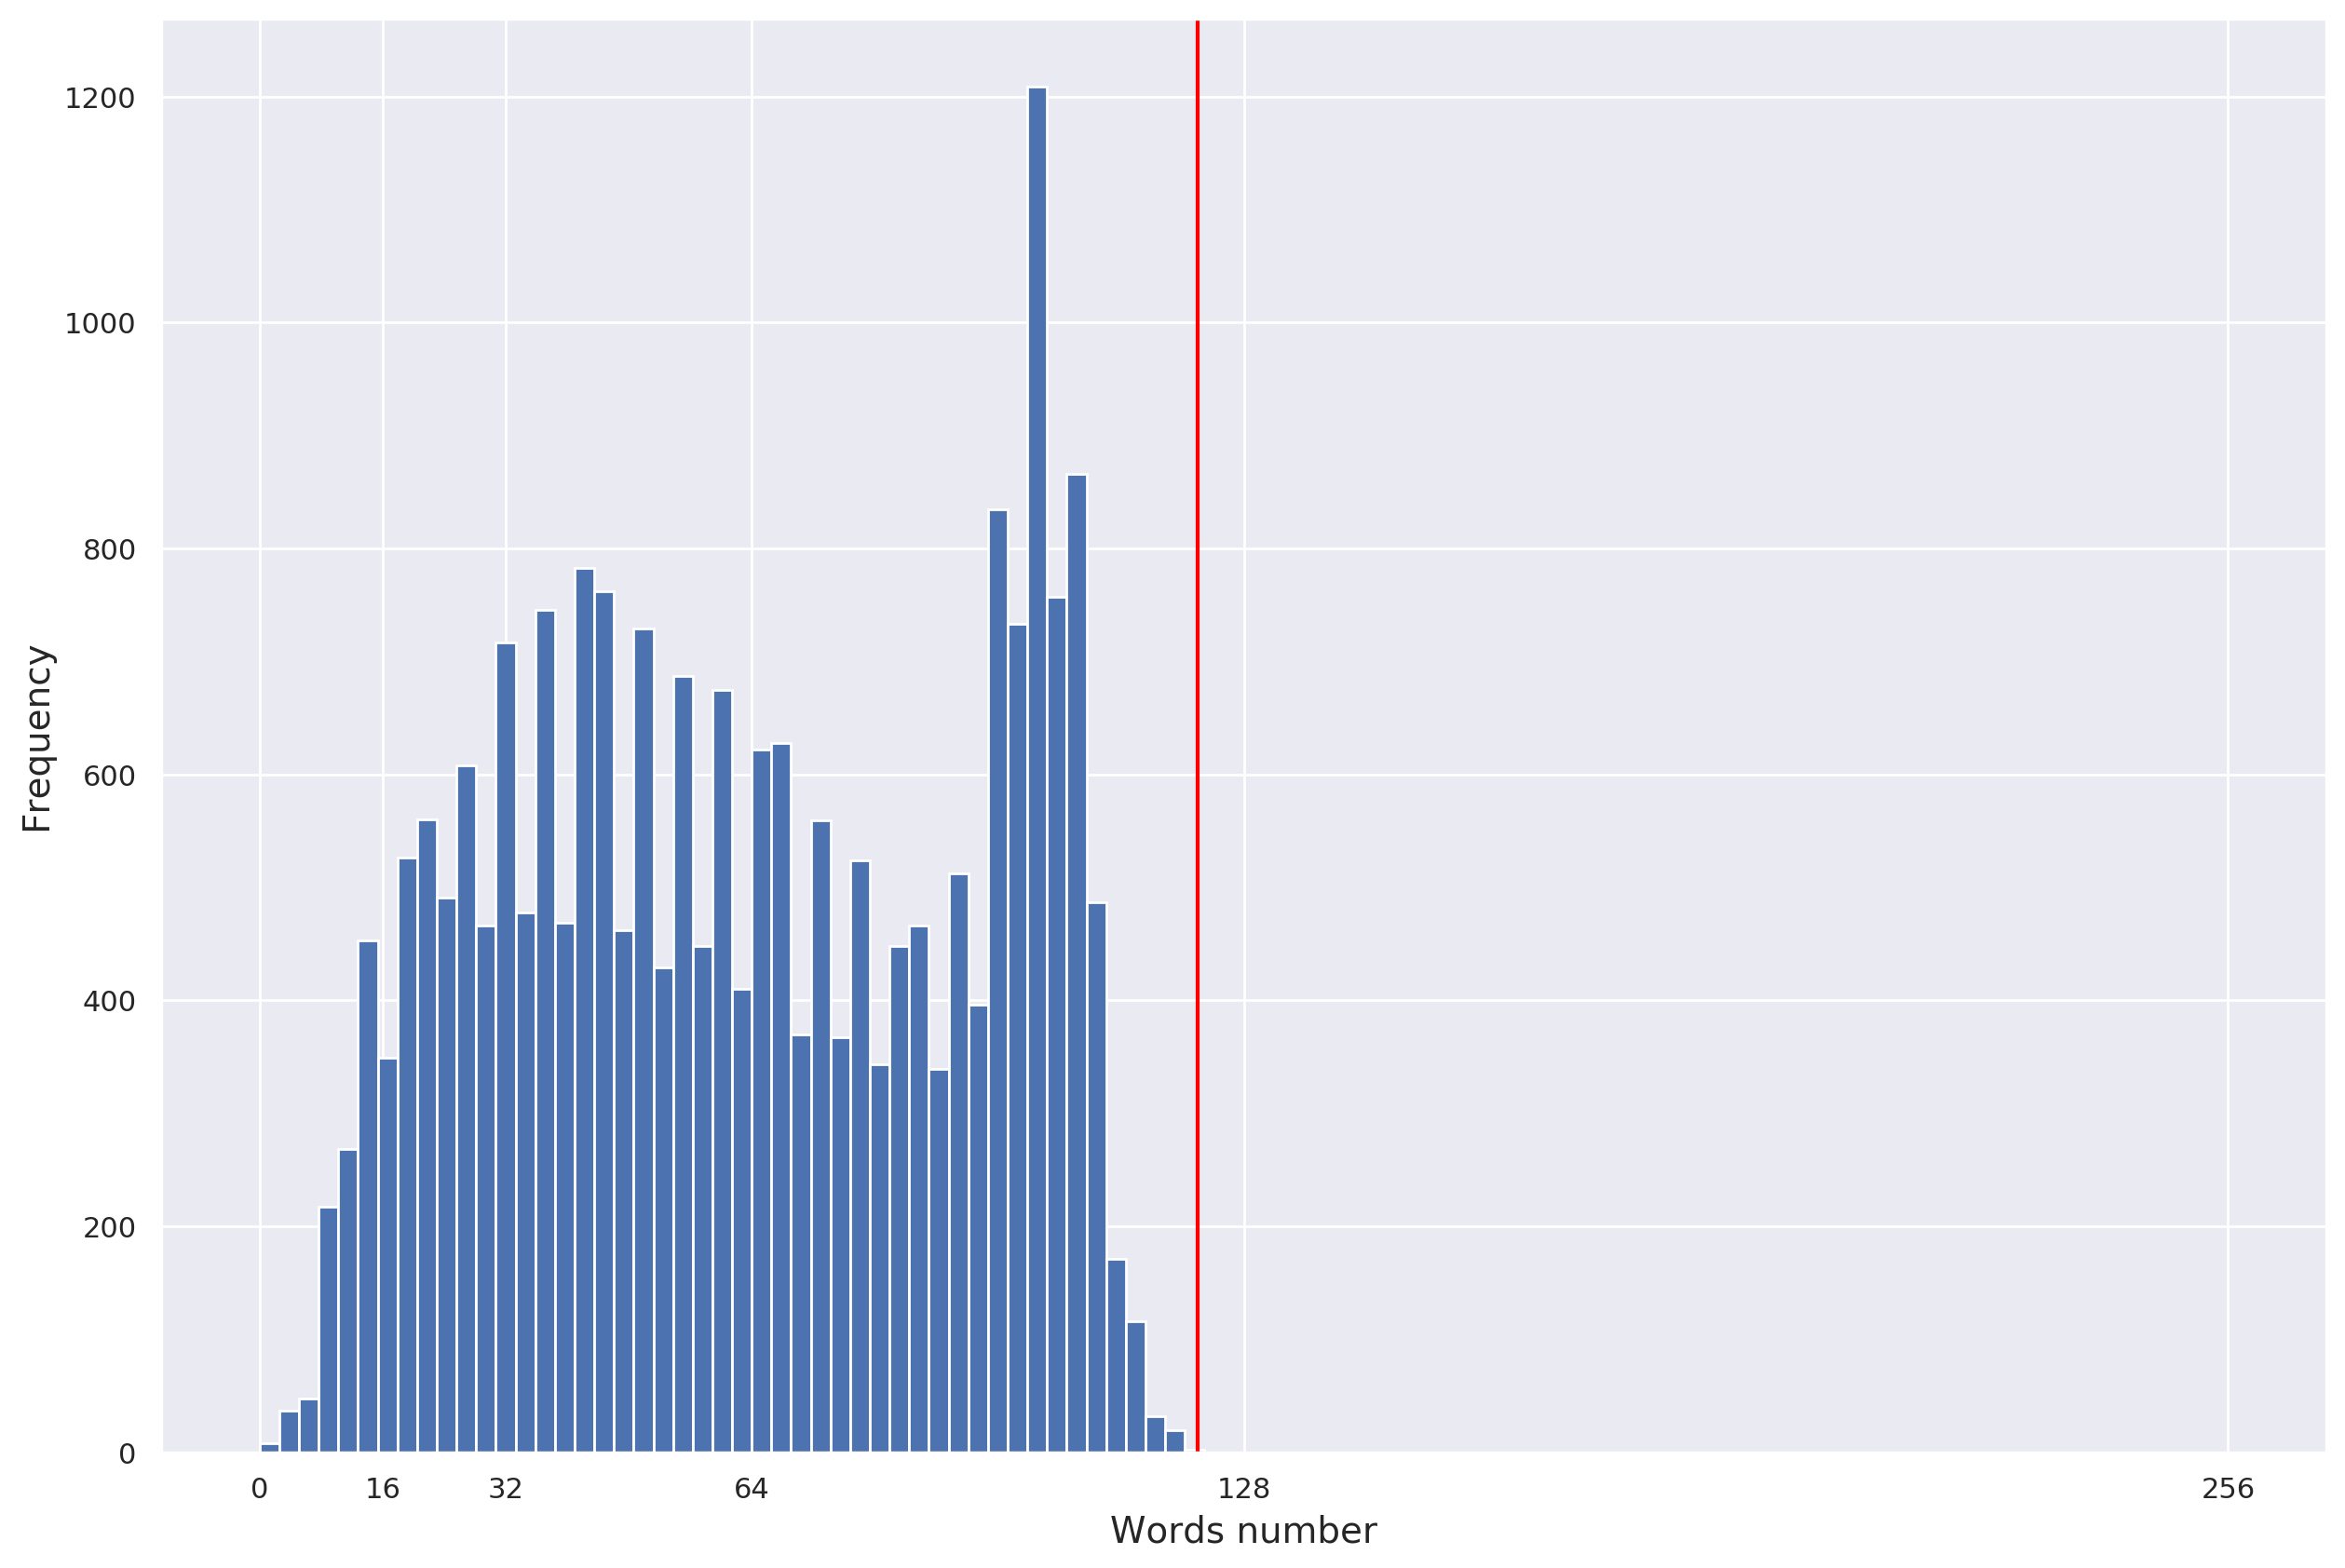

In [56]:
df_num_words["num_words"].plot.hist(xticks=[0, 16, 32, 64, 128, 256], bins=100, range=[0, 256]).axvline(
    x=summary["100%"], c="red"
)

plt.xlabel("Words number", fontsize='14')
plt.ylabel("Frequency", fontsize='14')
plt.savefig('distribution_num_words_per_review.png', dpi=300)
plt.show()

In [57]:
# Upload image to S3 bucket
sess.upload_data(path='distribution_num_words_per_review.png', bucket=bucket, key_prefix="images")

's3://sagemaker-us-east-1-156641161428/images/distribution_num_words_per_review.png'

Upload the notebook into S3 bucket for grading purposes.

**Note**: you may need to click on "Save" button before the upload.

In [58]:
!aws s3 cp ./C1_W1_Assignment.ipynb s3://$bucket/C1_W1_Assignment_Learner.ipynb

upload: ./C1_W1_Assignment.ipynb to s3://sagemaker-us-east-1-156641161428/C1_W1_Assignment_Learner.ipynb


Please go to the main lab window and click on `Submit` button (see the `Finish the lab` section of the instructions).